<center>
    <img src="https://s3-api.us-geo.objectstorage.softlayer.net/cf-courses-data/CognitiveClass/Logos/organization_logo/organization_logo.png" width="300" alt="cognitiveclass.ai logo">
</center>


#### Import the required libraries we need for the lab.


In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols
import warnings
warnings.filterwarnings('ignore')

#### Read the dataset in the csv file from the URL


In [3]:
df=pd.read_csv('https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv')

#### Add your code below following the instructions given in the course to complete the peer graded assignment


# Task 1: Familiar With Dataset - Data Processing

In [4]:
df.head(10)

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2
5,5,0.02985,0.0,2.18,0.0,0.458,6.430,58.7,6.0622,3.0,222.0,18.7,5.21,28.7
6,6,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,12.43,22.9
7,7,0.14455,12.5,7.87,0.0,0.524,6.172,96.1,5.9505,5.0,311.0,15.2,19.15,27.1
8,8,0.21124,12.5,7.87,0.0,0.524,5.631,100.0,6.0821,5.0,311.0,15.2,29.93,16.5
9,9,0.17004,12.5,7.87,0.0,0.524,6.004,85.9,6.5921,5.0,311.0,15.2,17.10,18.9


In [5]:
df.shape

(506, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  506 non-null    int64  
 1   CRIM        506 non-null    float64
 2   ZN          506 non-null    float64
 3   INDUS       506 non-null    float64
 4   CHAS        506 non-null    float64
 5   NOX         506 non-null    float64
 6   RM          506 non-null    float64
 7   AGE         506 non-null    float64
 8   DIS         506 non-null    float64
 9   RAD         506 non-null    float64
 10  TAX         506 non-null    float64
 11  PTRATIO     506 non-null    float64
 12  LSTAT       506 non-null    float64
 13  MEDV        506 non-null    float64
dtypes: float64(13), int64(1)
memory usage: 55.5 KB


In [7]:
df.isnull().sum()

Unnamed: 0    0
CRIM          0
ZN            0
INDUS         0
CHAS          0
NOX           0
RM            0
AGE           0
DIS           0
RAD           0
TAX           0
PTRATIO       0
LSTAT         0
MEDV          0
dtype: int64

In [8]:
df.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Data is ready for analysis.

# Task 2 - Generate Descriptive Statistics and Visualizations

Instruction: For the "Median value of owner-occupied homes" provide a boxplot

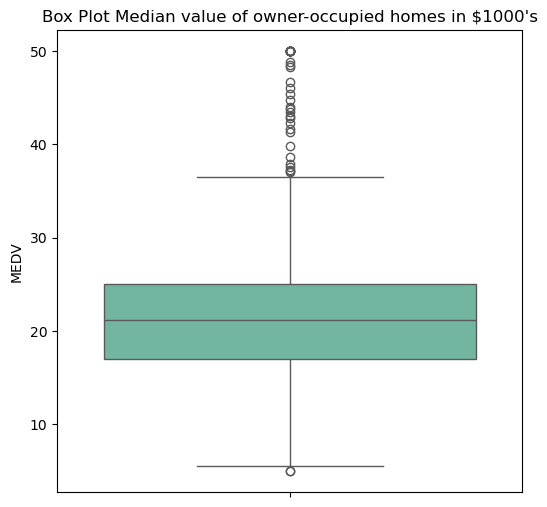

In [9]:
plt.figure(figsize=(6,6))
sns.boxplot(data=df, y='MEDV', palette='Set2')
plt.title("Box Plot Median value of owner-occupied homes in $1000's");

_The distribution of MEDV is approximately symmetric._

Instruction: Provide a  bar plot for the Charles river variable

<Figure size 600x600 with 0 Axes>

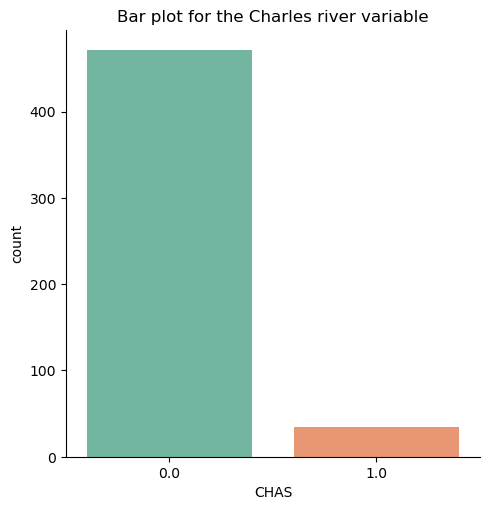

In [10]:
plt.figure(figsize=(6,6))
sns.catplot(data=df, x='CHAS', kind='count', palette='Set2')
plt.title("Bar plot for the Charles river variable");

_Most of house is not near Charles River._

Instruction: Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)

2.9 100.0


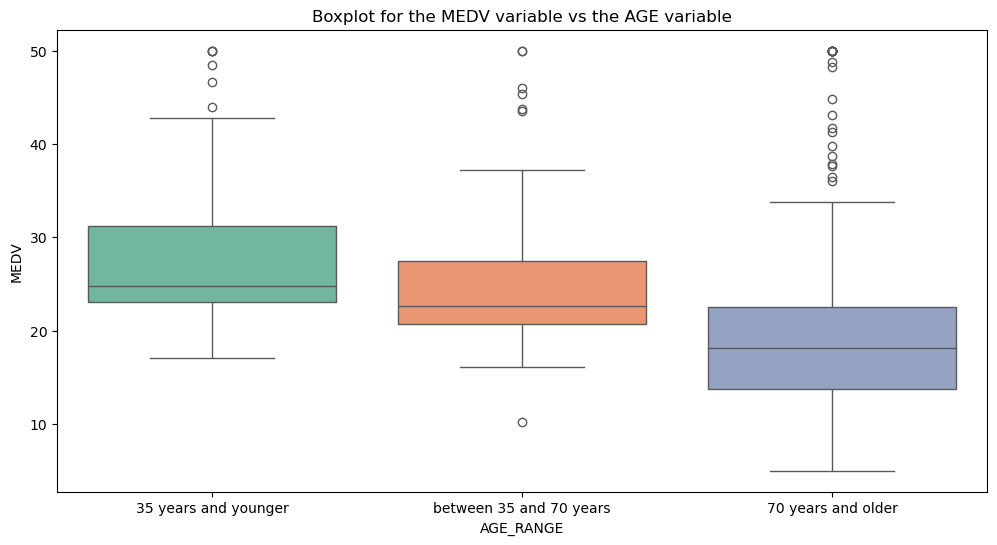

In [11]:
# Add AGE_RANGE
min_age = float(df[['AGE']].min())
max_age = float(df[['AGE']].max())
print(min_age, max_age)
bins=[min_age, 35, 70, max_age]
labels = ['35 years and younger', 'between 35 and 70 years', '70 years and older']
df['AGE_RANGE'] = pd.cut(df.AGE, bins=bins, labels=labels)

plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='AGE_RANGE', y='MEDV', palette='Set2')
plt.title("Boxplot for the MEDV variable vs the AGE variable");

_MEDN tends to decrease when AGE moves from 35 years to between 35 and 70 years and more than 70 years perspectively._

Intrustion: Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?

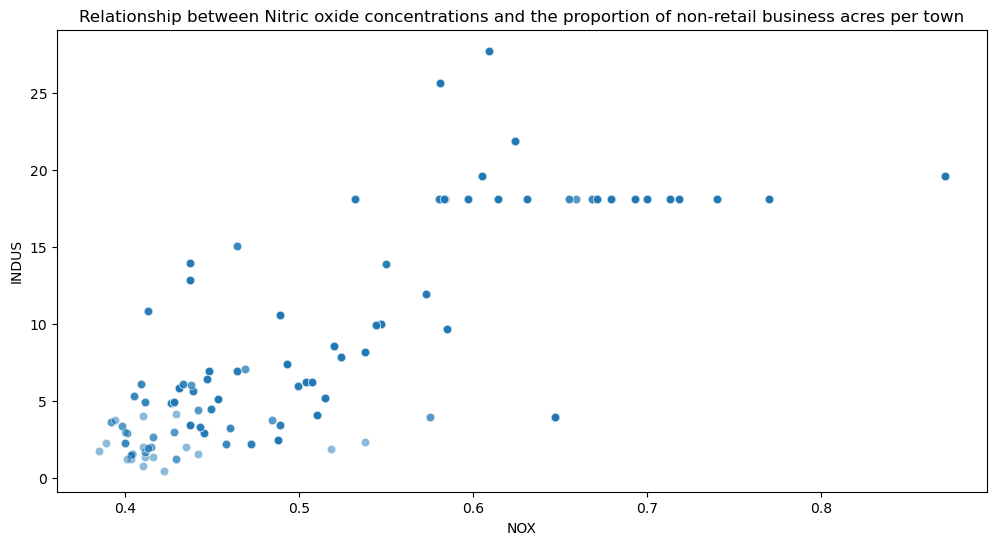

In [12]:
plt.figure(figsize=(12,6))
sns.scatterplot(data=df, x='NOX', y='INDUS', palette='Set2', alpha=0.5)
plt.title("Relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town");

_There exists a positive relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. The percentage of non-retail business acres per town tends to incease when Nitric oxide concentrations rises._

Instruction: Create a histogram for the pupil to teacher ratio variable

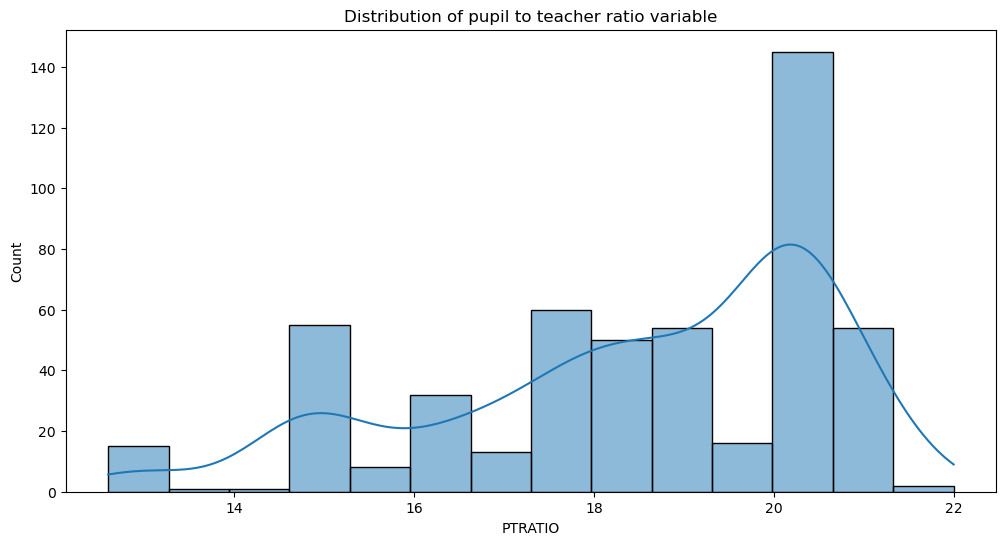

In [13]:
plt.figure(figsize=(12,6))
sns.histplot(data=df, x='PTRATIO', palette='Set2', kde=True)
plt.title("Distribution of pupil to teacher ratio variable");

# Task 3: Use the appropriate tests to answer the questions provided.

For each of the following questions;

Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)

Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)

Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)

What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)

Be sure to:

State your hypothesis.

Use α = 0.05

Perform the test Statistics.

State the conclusion from the test.

**Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)**

In [14]:
print('''
Hypothesis Statement:
    H0: There is no difference in median value of houses bounded by the Charles river or not.
    H1: There is a difference in median value of houses bounded by the Charles river or not.
''')

near_river = df[df['CHAS'] == 1]['MEDV']
not_near_river = df[df['CHAS'] == 0]['MEDV']
t_value, p_value = scipy.stats.ttest_ind(near_river, not_near_river)
print(f'''
Test Result:
    t-value: {t_value}
    p_value:{p_value}
''')

print('''
Conclusion: With α = 0.05, we have enough evidence to reject the null hypothesis. Hence,
There is a significant difference in median value of houses bounded by the Charles river or not.
''')


Hypothesis Statement:
    H0: There is no difference in median value of houses bounded by the Charles river or not.
    H1: There is a difference in median value of houses bounded by the Charles river or not.


Test Result:
    t-value: 3.996437466090509
    p_value:7.390623170519905e-05


Conclusion: With α = 0.05, we have enough evidence to reject the null hypothesis. Hence,
There is a significant difference in median value of houses bounded by the Charles river or not.



**Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)**

In [15]:
print('''
Hypothesis Statement:
    H0: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
    H1: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
''')

less_35 = df[df['AGE_RANGE'] == '35 years and younger']['MEDV']
from_35_to_70 = df[df['AGE_RANGE'] == 'between 35 and 70 years']['MEDV']
more_70 = df[df['AGE_RANGE'] == '70 years and older']['MEDV']
f_stas, p_value = scipy.stats.f_oneway(less_35, from_35_to_70, more_70)
print(f'''
Test Result:
    f_stas: {f_stas}
    p_value:{p_value}
''')

print('''
Conclusion: With α = 0.05, we have enough evidence to reject the null hypothesis. Hence, there is a difference in Median values of 
houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
''')


Hypothesis Statement:
    H0: There is no difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).
    H1: There is a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).


Test Result:
    f_stas: 36.23453758619041
    p_value:1.998493186839628e-15


Conclusion: With α = 0.05, we have enough evidence to reject the null hypothesis. Hence, there is a difference in Median values of 
houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE).



**Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation).**

In [16]:
print('''
Hypothesis Statement:
    H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
    H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
''')

stas, p_value = scipy.stats.pearsonr(df['INDUS'], df['NOX'])
print(f'''
Test Result:
    stas: {stas}
    p_value:{p_value}
''')

print('''
Conclusion: With α = 0.05, we have enough evidence to reject the null hypothesis. Hence, There is a positive relationship between 
Nitric oxide concentrations and proportion of non-retail business acres per town.
''')


Hypothesis Statement:
    H0: There is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.
    H1: There is a relationship between Nitric oxide concentrations and proportion of non-retail business acres per town.


Test Result:
    stas: 0.7636514469209162
    p_value:7.913361061232958e-98


Conclusion: With α = 0.05, we have enough evidence to reject the null hypothesis. Hence, There is a positive relationship between 
Nitric oxide concentrations and proportion of non-retail business acres per town.



**What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)**

In [25]:
print('''
Hypothesis Statement:
    H0: Weighted distances to five Boston employment centres are not related to median value.
    H1: Weighted distances to five Boston employment centres are related to median value.
''')

X = df[['DIS']]
Y = df[['MEDV']]

X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
print(model.summary())

print('''
Conclusion: With coef is 1.0916 and p-value is nearly zeo, we have enough evidence to reject the null hypothesis. There is a positive relationship between these variabels.
If weighted distance to the five Boston employment centres increase 1 unit, the median value of owner occupied homes goes up 1.0916 unit.
''')


Hypothesis Statement:
    H0: Weighted distances to five Boston employment centres are not related to median value.
    H1: Weighted distances to five Boston employment centres are related to median value.

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Tue, 22 Oct 2024   Prob (F-statistic):           1.21e-08
Time:                        22:02:30   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
  